In [35]:
#importing some packages
import pandas as pd         
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

In [36]:
# loading the dataset
data = pd.read_csv('dataset_full.csv')
data

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [37]:
data.tls_ssl_certificate.value_counts()

1    44895
0    43752
Name: tls_ssl_certificate, dtype: int64

In [38]:
print(data.columns)
data.shape

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)


(88647, 112)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [40]:
# Separating our target variable 'Label' from rest data.
y = data['phishing']
x = data.drop('phishing', axis= 1)

In [41]:
x.index

RangeIndex(start=0, stop=88647, step=1)

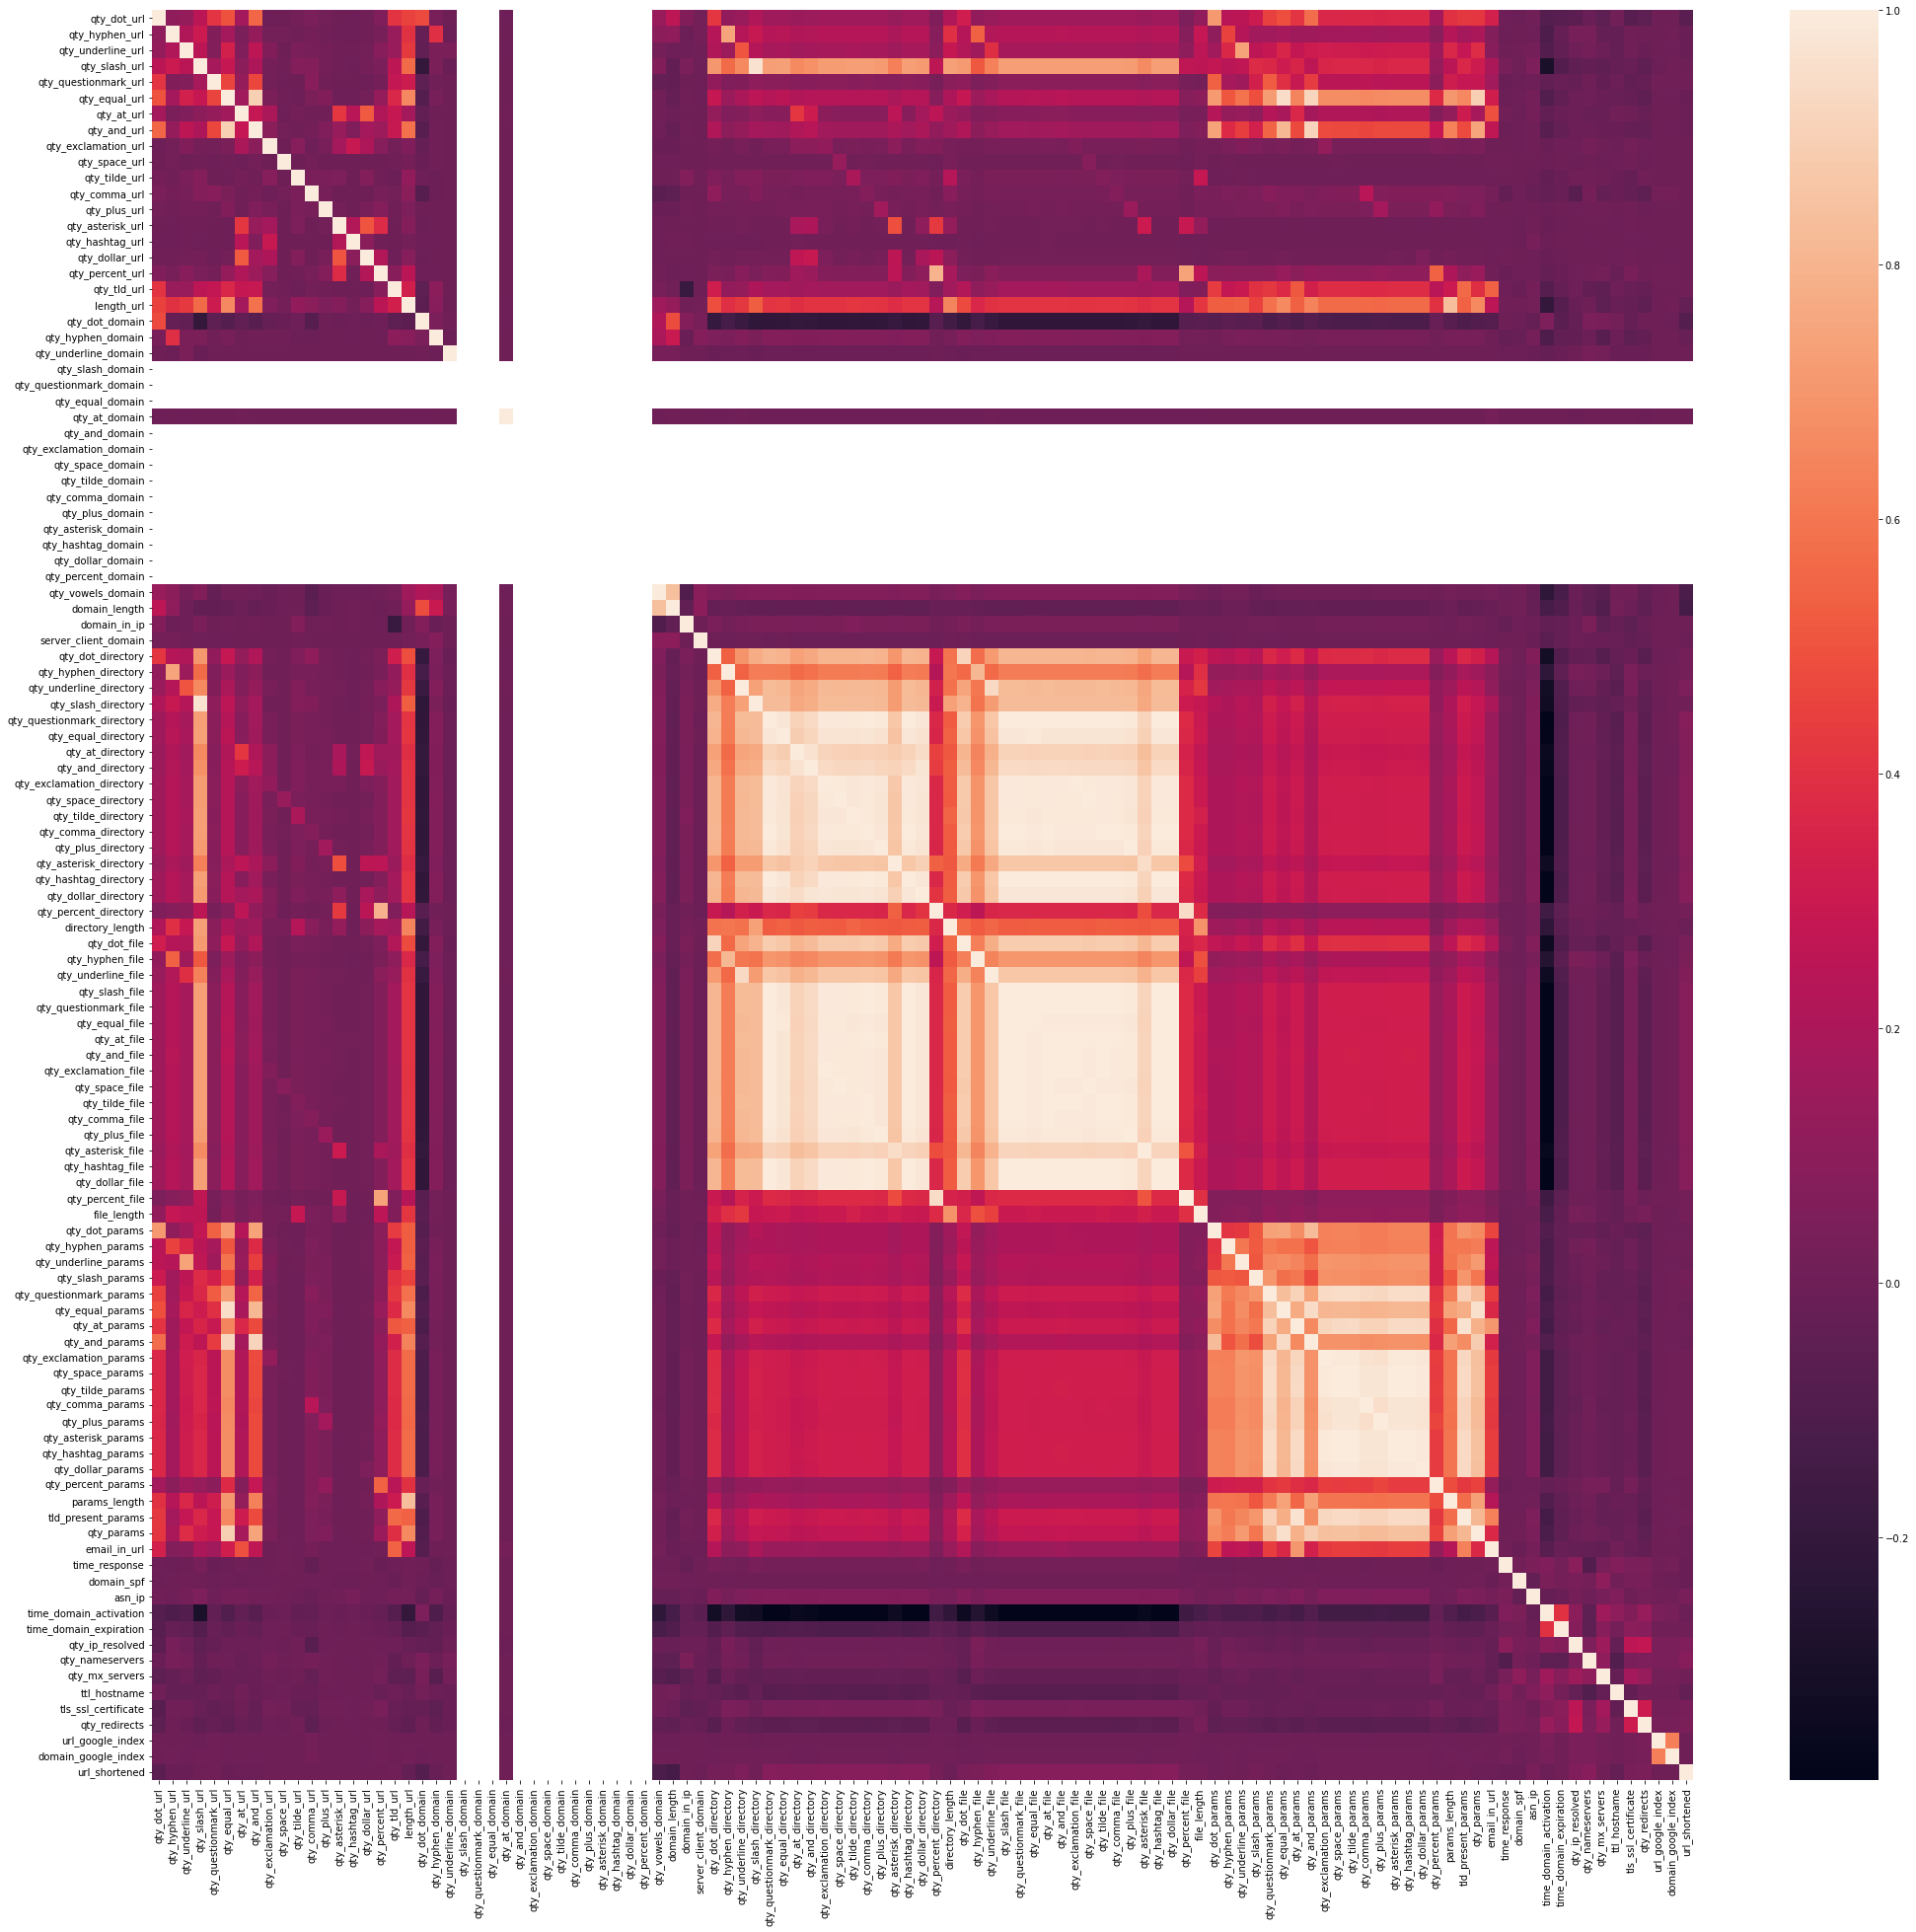

In [42]:
# using heatmap to find the correlation b/w the features

plt.figure(figsize=(35,33))
sns.heatmap(x.corr())
plt.show()

So from above heatmap we can observe a high correlation b/w features 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain','qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain','qty_tilde_domain','qty_comma_domain','qty_plus_domain','qty_asterisk_domain','qty_dollar_domain','qty_hashtag_domain','qty_percent_domain' so we will remove these features.

In [43]:
x = x.drop(['qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain','qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain',\
            'qty_tilde_domain','qty_comma_domain','qty_plus_domain','qty_asterisk_domain','qty_dollar_domain','qty_hashtag_domain',\
                'qty_percent_domain'], axis = 1)

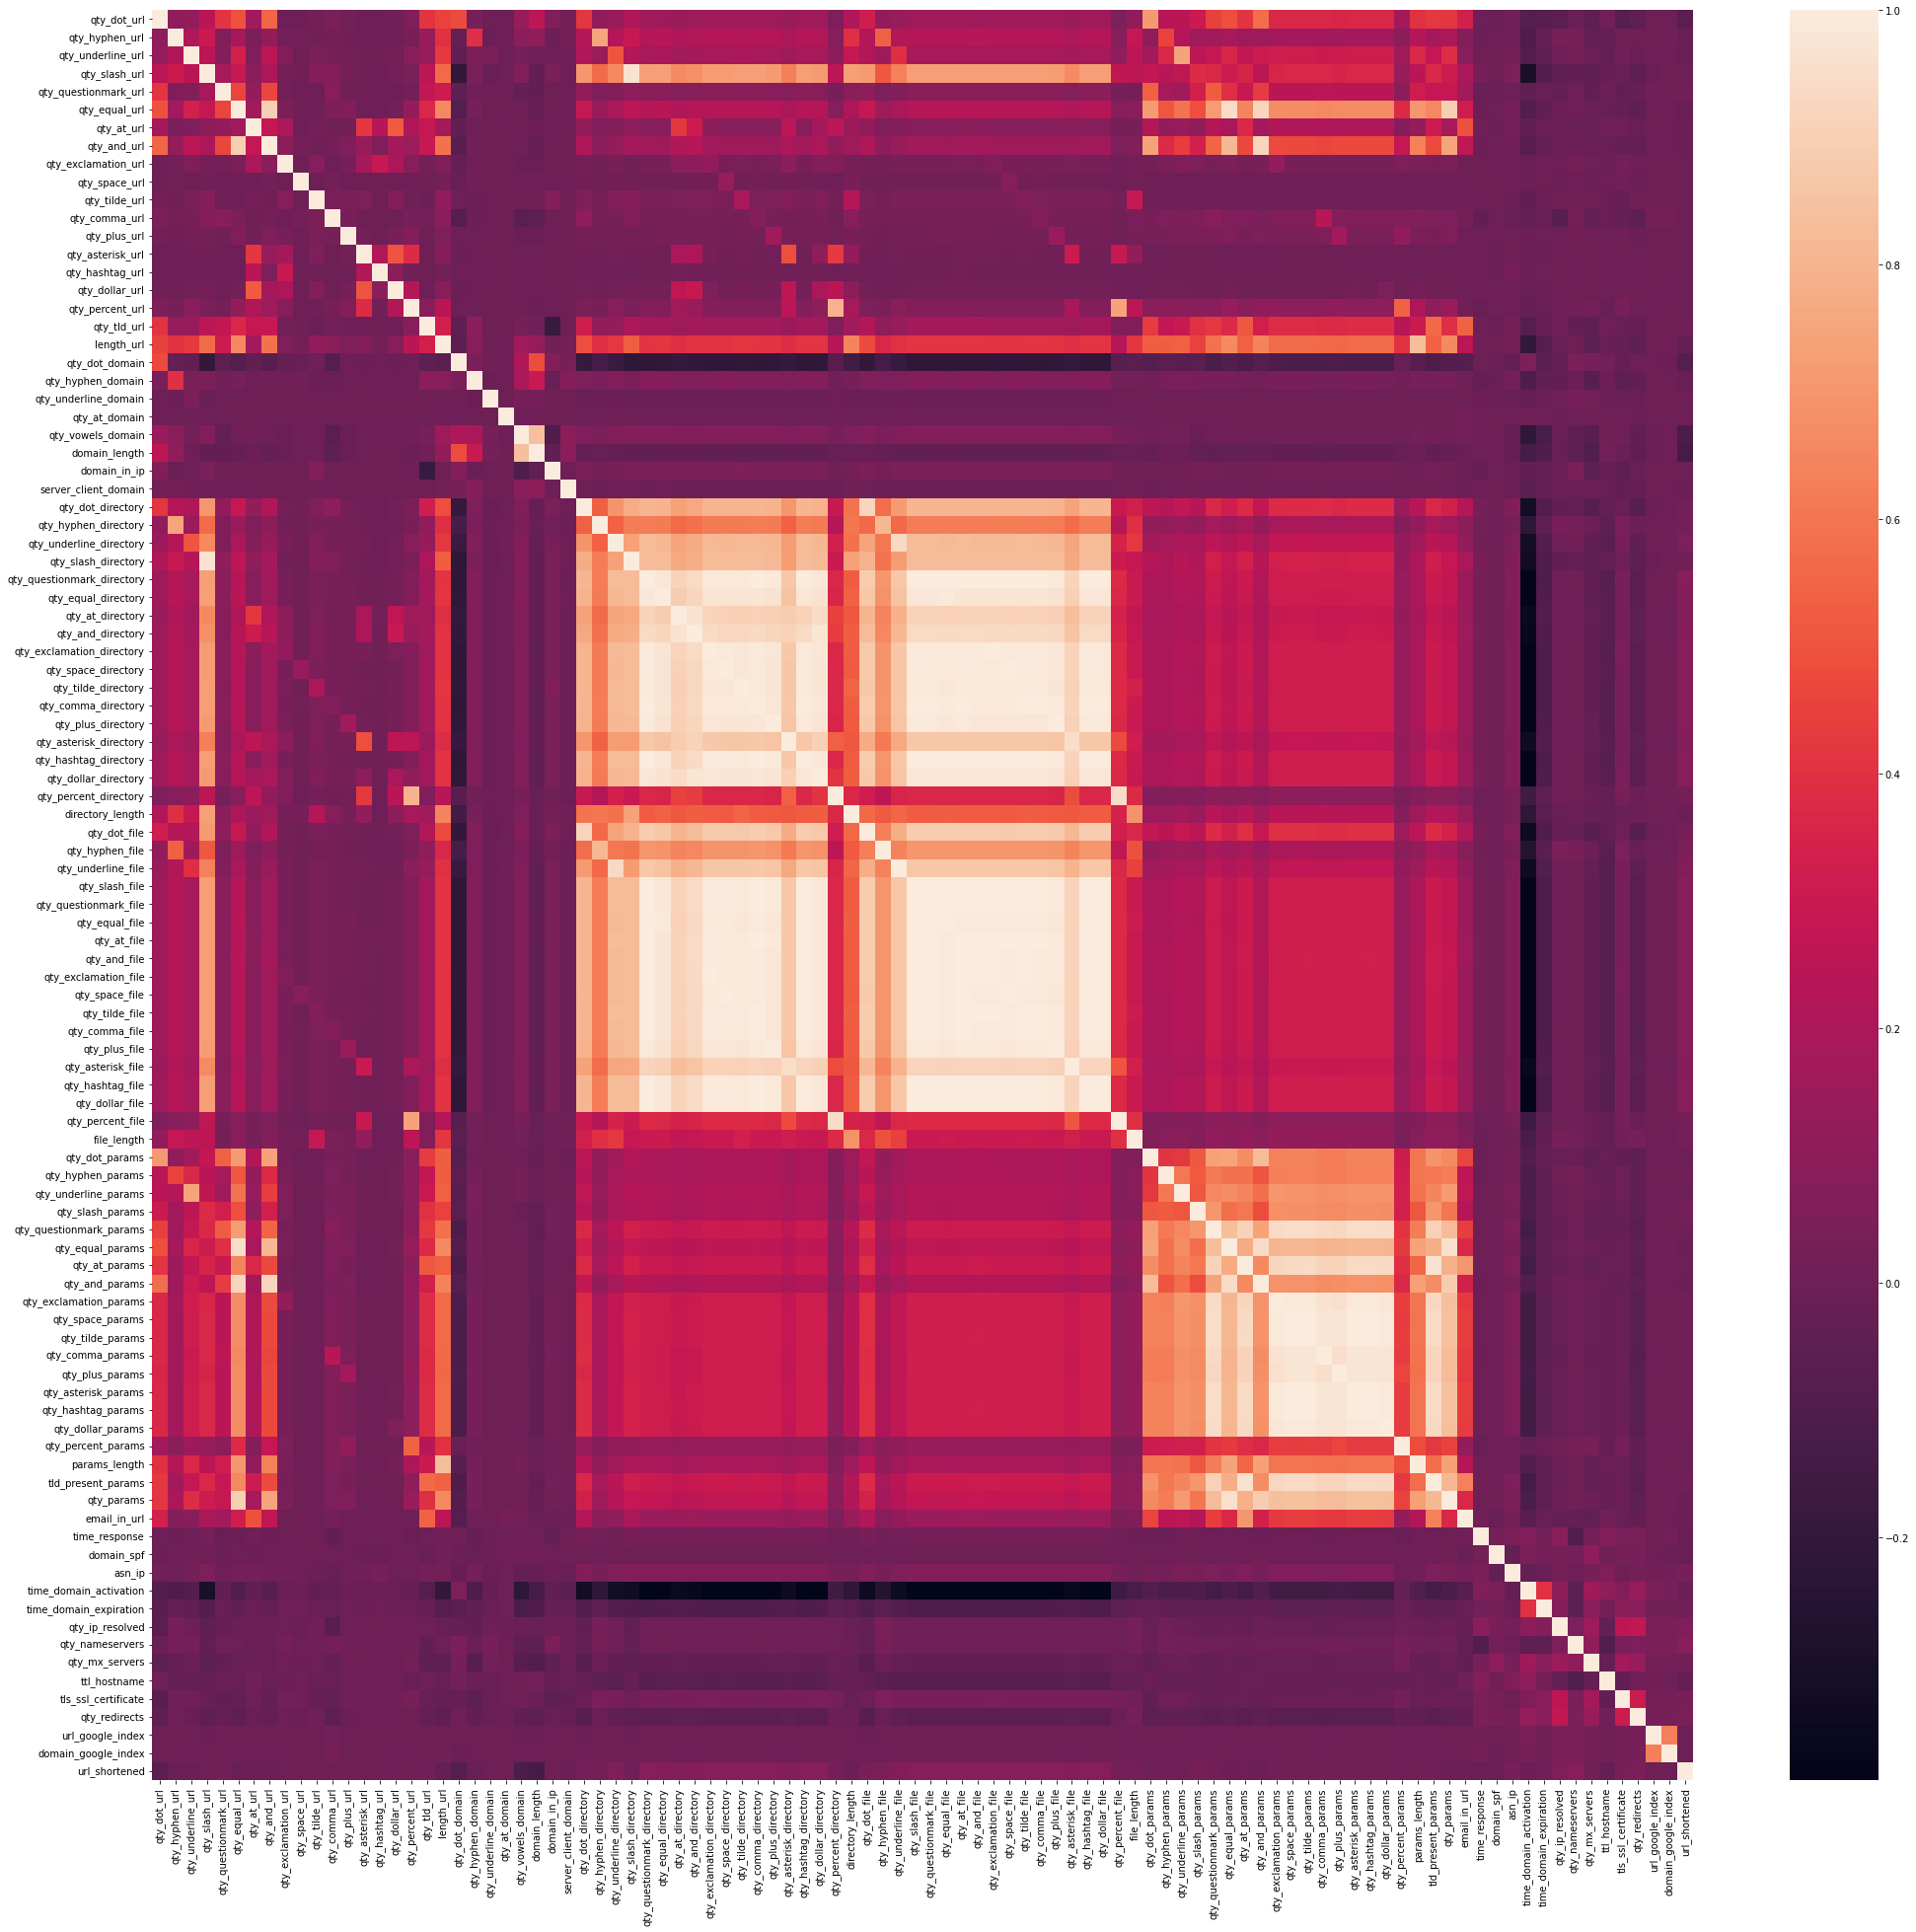

In [44]:
# again checking using heatmap
plt.figure(figsize=(35,33))
sns.heatmap(x.corr())
plt.show()

In [45]:
x.shape

(88647, 98)

In [46]:
# finding all features which has high correlation with the target label

imp_feat = []
corr = data.corr()['phishing']
print(corr)

# corr = corr.to_numpy()
# print(corr)

for value in corr:
  # print(value)
  
  if value > 0.7:
    imp_feat.append(corr[corr==value].index[0])

  elif value < -0.1:
    imp_feat.append(corr[corr==value].index[0])

print(imp_feat)
print(len(imp_feat))

qty_dot_url             0.171128
qty_hyphen_url          0.200382
qty_underline_url       0.191151
qty_slash_url           0.699061
qty_questionmark_url    0.111694
                          ...   
qty_redirects          -0.061775
url_google_index       -0.008986
domain_google_index     0.000794
url_shortened           0.099250
phishing                1.000000
Name: phishing, Length: 112, dtype: float64
['qty_dot_domain', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_questionmark_directory', 'qty_dollar_directory', 'qty_dot_file', 'qty_questionmark_directory', 'qty_questionmark_directory', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file', 'qty_questionmark_directory', 'qty_questionmark_directory', 'time_domain_activation

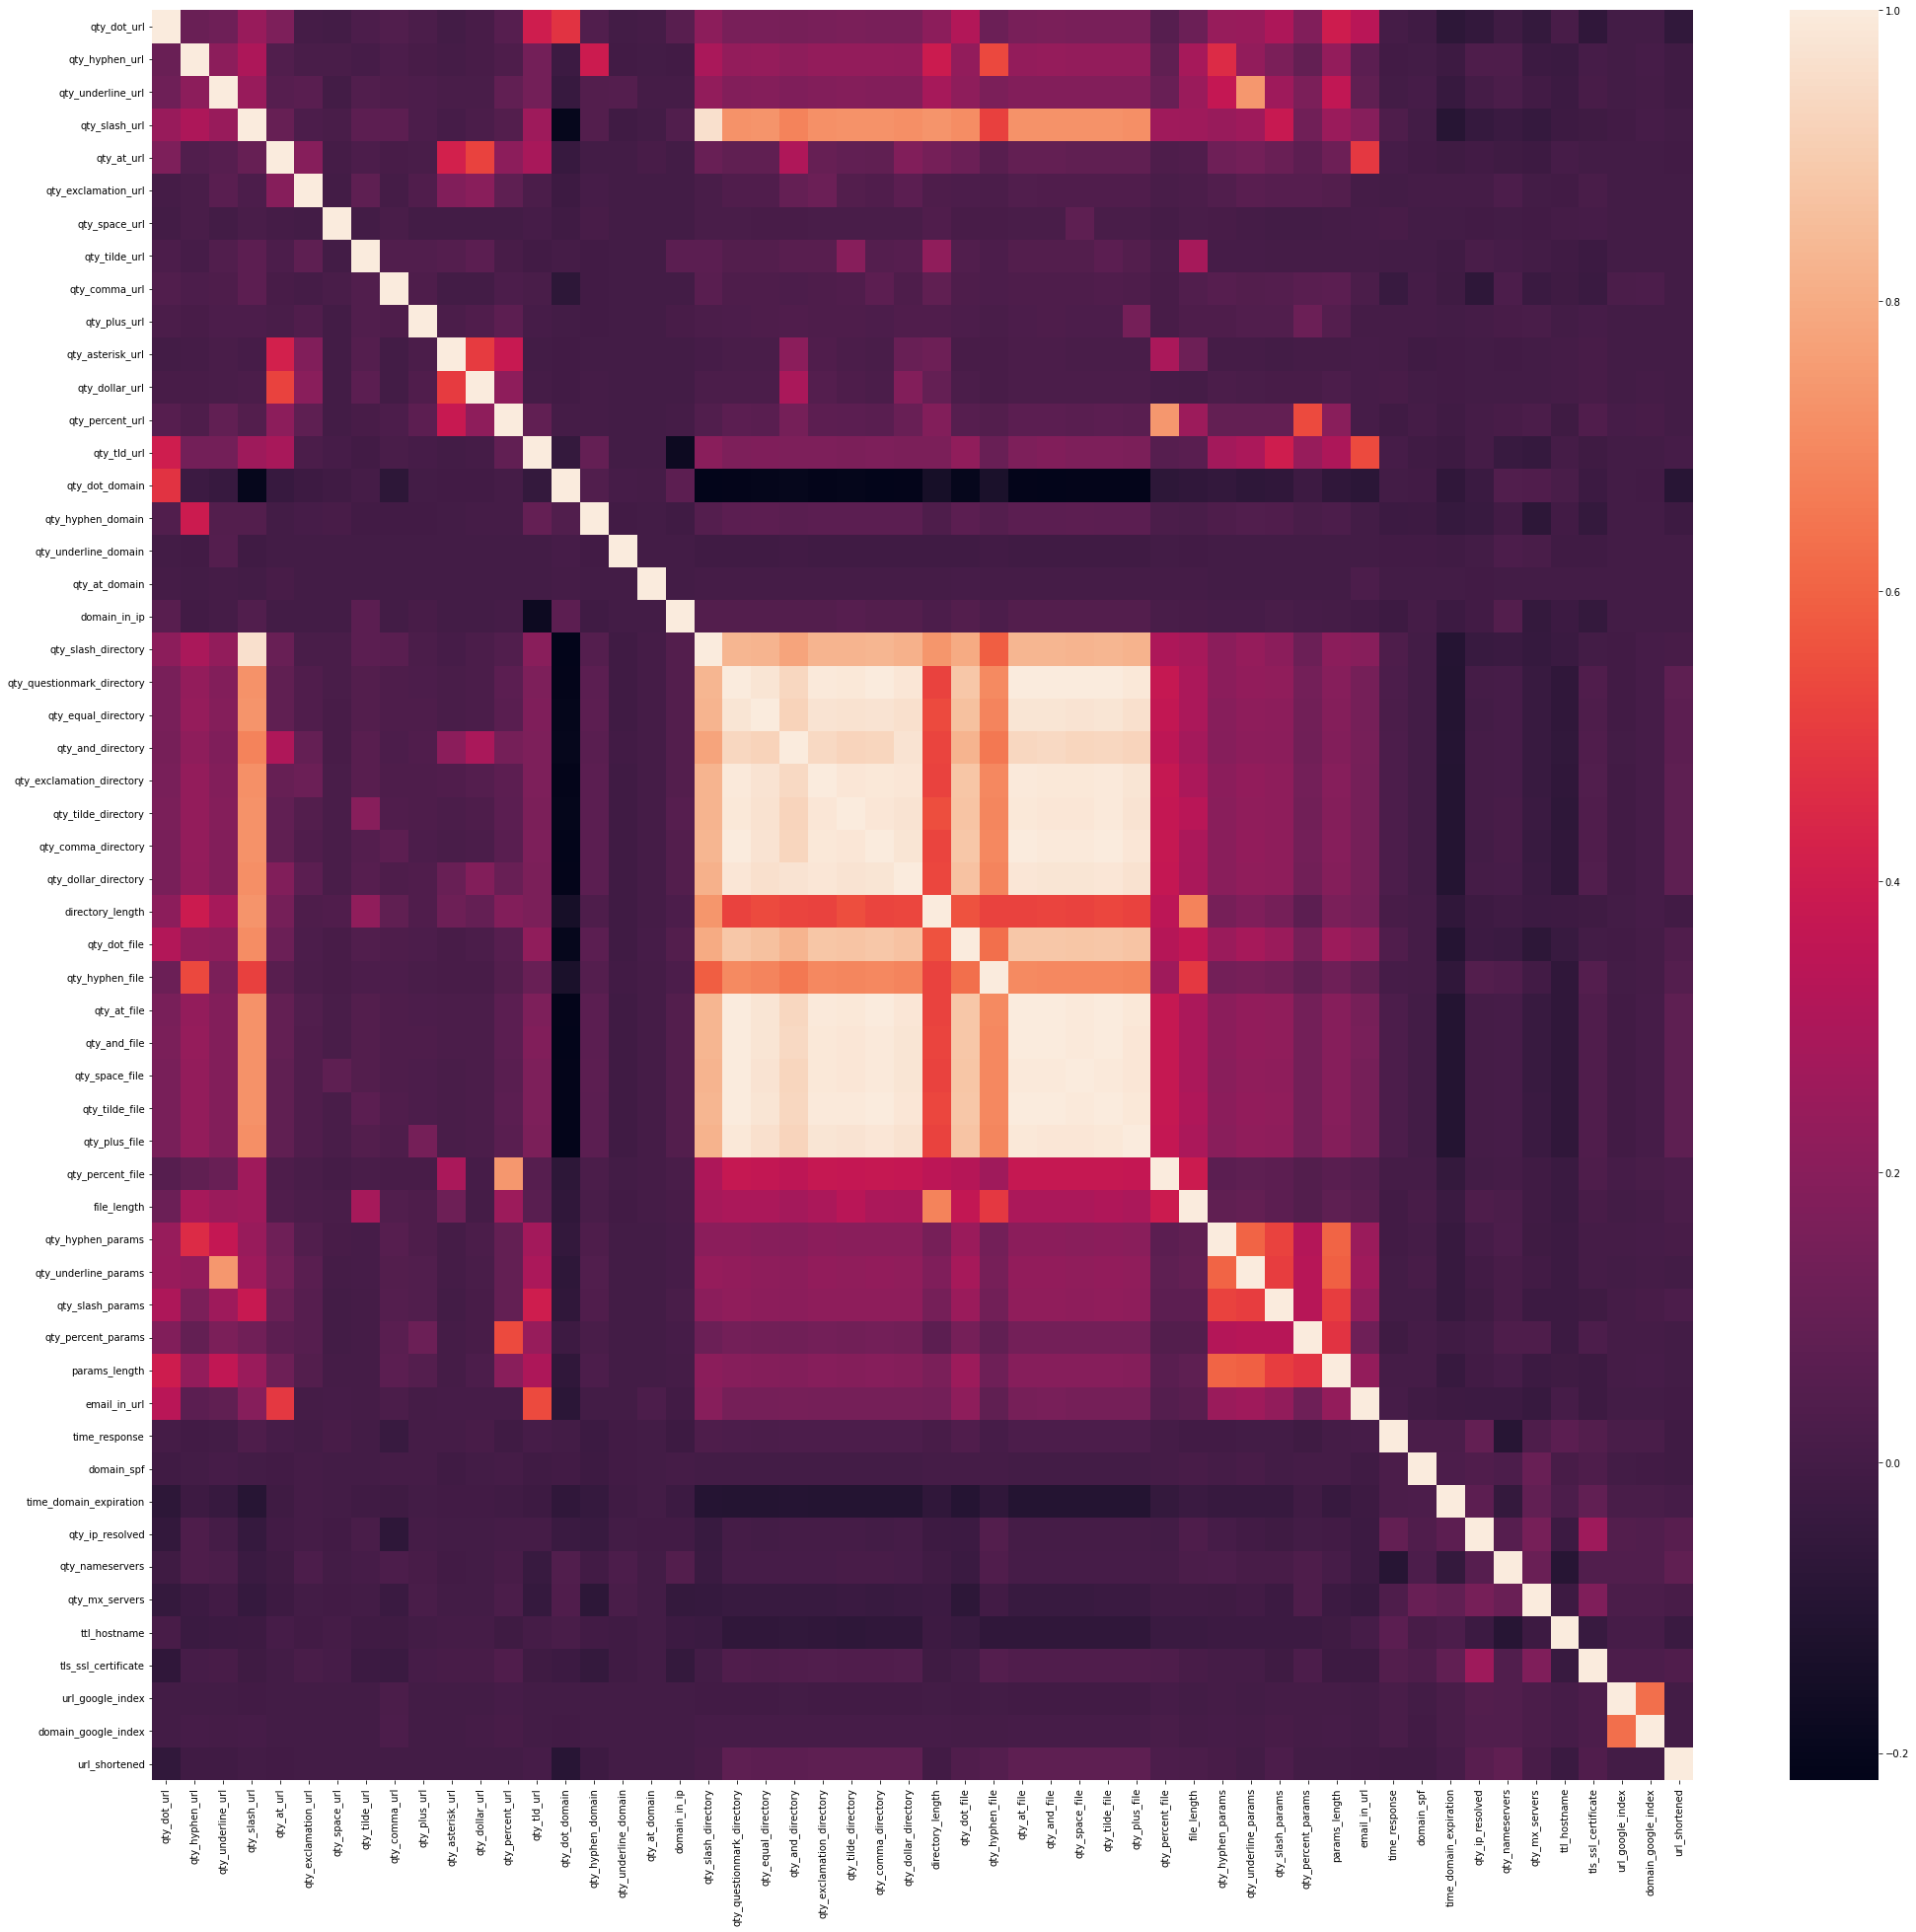

       qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0                3               0                  0              1   
1                5               0                  1              3   
2                2               0                  0              1   
3                4               0                  2              5   
4                2               0                  0              0   
...            ...             ...                ...            ...   
88642            3               1                  0              0   
88643            2               0                  0              0   
88644            2               1                  0              5   
88645            2               0                  0              1   
88646            2               0                  0              0   

       qty_at_url  qty_exclamation_url  qty_space_url  qty_tilde_url  \
0               0                    0              0          

In [47]:
# removing all features with high correlation with some other feature but not with target label

corr_matrix = x.corr()
# getting index & column label no. where low to moderate correlation exists based on below condition
i,j = np.where(corr_matrix[corr_matrix < 0.8] > -0.2 )

# getting the list of feature pairs that have low to moderate(desired) correlation b/w them
feat_lst = list(zip(corr_matrix.index[i],corr_matrix.columns[j]))

# creating a list of all feature pair tuples in the correlation matrix 
feat_tuple = []
for col in list(corr_matrix.columns):
    for row in list(corr_matrix.columns):
        feat_tuple.append((row,col))

# getting all feature pairs with high correlation b/w them
feat_final = list(set(feat_tuple)-set(feat_lst))
# print(len(feat_final))
# print(feat_final)

# checking & removing of any duplicate feature pair exists in reveresed order among high correlation feature pair
for tup in feat_final:
    rev_tup = (tup[1],tup[0])
    if rev_tup in feat_final:
        feat_final.remove(rev_tup)
    
# print(feat_final)
# print(len(feat_final))

# selecting all second features in high correlation feature pair tuple to remove next
drop_feat = []
for ele in feat_final:
    drop_feat.append(ele[1])

drop_feat=list(set(drop_feat))

# print(len(drop_feat))

# removing features from drop_feat list which are present in imp_feat list
for f in drop_feat:
    if f in imp_feat:
        drop_feat.remove(f)


#removing second feature in high correlation feature pair tuple
x = x.drop(drop_feat, axis = 1)    

plt.figure(figsize=(35,33))
sns.heatmap(x.corr())
plt.show()

print(x)

Finally we have 47 features that have very low correlation and high correlation with target label and will help us to get the real picture of target variable

In [48]:
print(x.shape )
print(x.columns)

(88647, 54)
Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_at_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_dollar_url',
       'qty_percent_url', 'qty_tld_url', 'qty_dot_domain', 'qty_hyphen_domain',
       'qty_underline_domain', 'qty_at_domain', 'domain_in_ip',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_and_directory', 'qty_exclamation_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_dollar_directory',
       'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_at_file',
       'qty_and_file', 'qty_space_file', 'qty_tilde_file', 'qty_plus_file',
       'qty_percent_file', 'file_length', 'qty_hyphen_params',
       'qty_underline_params', 'qty_slash_params', 'qty_percent_params',
       'params_length', 'email_in_url', 'time_response', 'domain_spf',
       'time_domain_expiration', 

In [49]:
# getting some statistics on our data
x.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_at_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,...,domain_spf,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,url_google_index,domain_google_index,url_shortened
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.022133,0.002944,0.001015,0.003226,0.002166,0.002786,...,-0.017925,352.043250,1.136564,2.772412,1.742428,6159.877514,0.506447,0.00141,0.002019,0.005482
std,1.235636,1.119286,0.657767,1.893929,0.279652,0.087341,0.072653,0.078127,0.075968,0.110904,...,0.559366,598.264801,0.895146,1.322999,1.706705,11465.583810,0.499961,0.05864,0.063250,0.073841
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.00000,-1.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,1.000000,2.000000,1.000000,292.000000,0.000000,0.00000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,168.000000,1.000000,2.000000,1.000000,2029.000000,1.000000,0.00000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,354.000000,1.000000,4.000000,2.000000,10798.000000,1.000000,0.00000,0.000000,0.000000
max,24.000000,35.000000,21.000000,44.000000,43.000000,10.000000,9.000000,5.000000,11.000000,19.000000,...,1.000000,22574.000000,24.000000,20.000000,20.000000,604800.000000,1.000000,1.00000,1.000000,1.000000


Some feature values remain unchanged for most of the data points so we will indentify such features and try to remove them since they don't help in classification of the data point.

In [50]:
#checking the data for null or missing values
x.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_at_url                    0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_at_domain                 0
domain_in_ip                  0
qty_slash_directory           0
qty_questionmark_directory    0
qty_equal_directory           0
qty_and_directory             0
qty_exclamation_directory     0
qty_tilde_directory           0
qty_comma_directory           0
qty_dollar_directory          0
directory_length              0
qty_dot_file                  0
qty_hyphen_file               0
qty_at_file                   0
qty_and_

In [51]:
#checking imbalance in the dataset 
print(y.value_counts())
total = y.shape[0]
leg_percent = (y.value_counts()[0]/total)*100
phi_percent = (y.value_counts()[1]/total)*100
print(f'legitimate url class has {leg_percent} percent values')
print(f'phishing url class has {phi_percent} percent values')

0    58000
1    30647
Name: phishing, dtype: int64
legitimate url class has 65.42804607036899 percent values
phishing url class has 34.57195392963101 percent values


We have slight class imbalance in dataset with 65% legitimate class urls & 35% phishing class urls. So we will select performance metrics like AU-ROC & confusion matrix parameters to get the idea about model performance. 

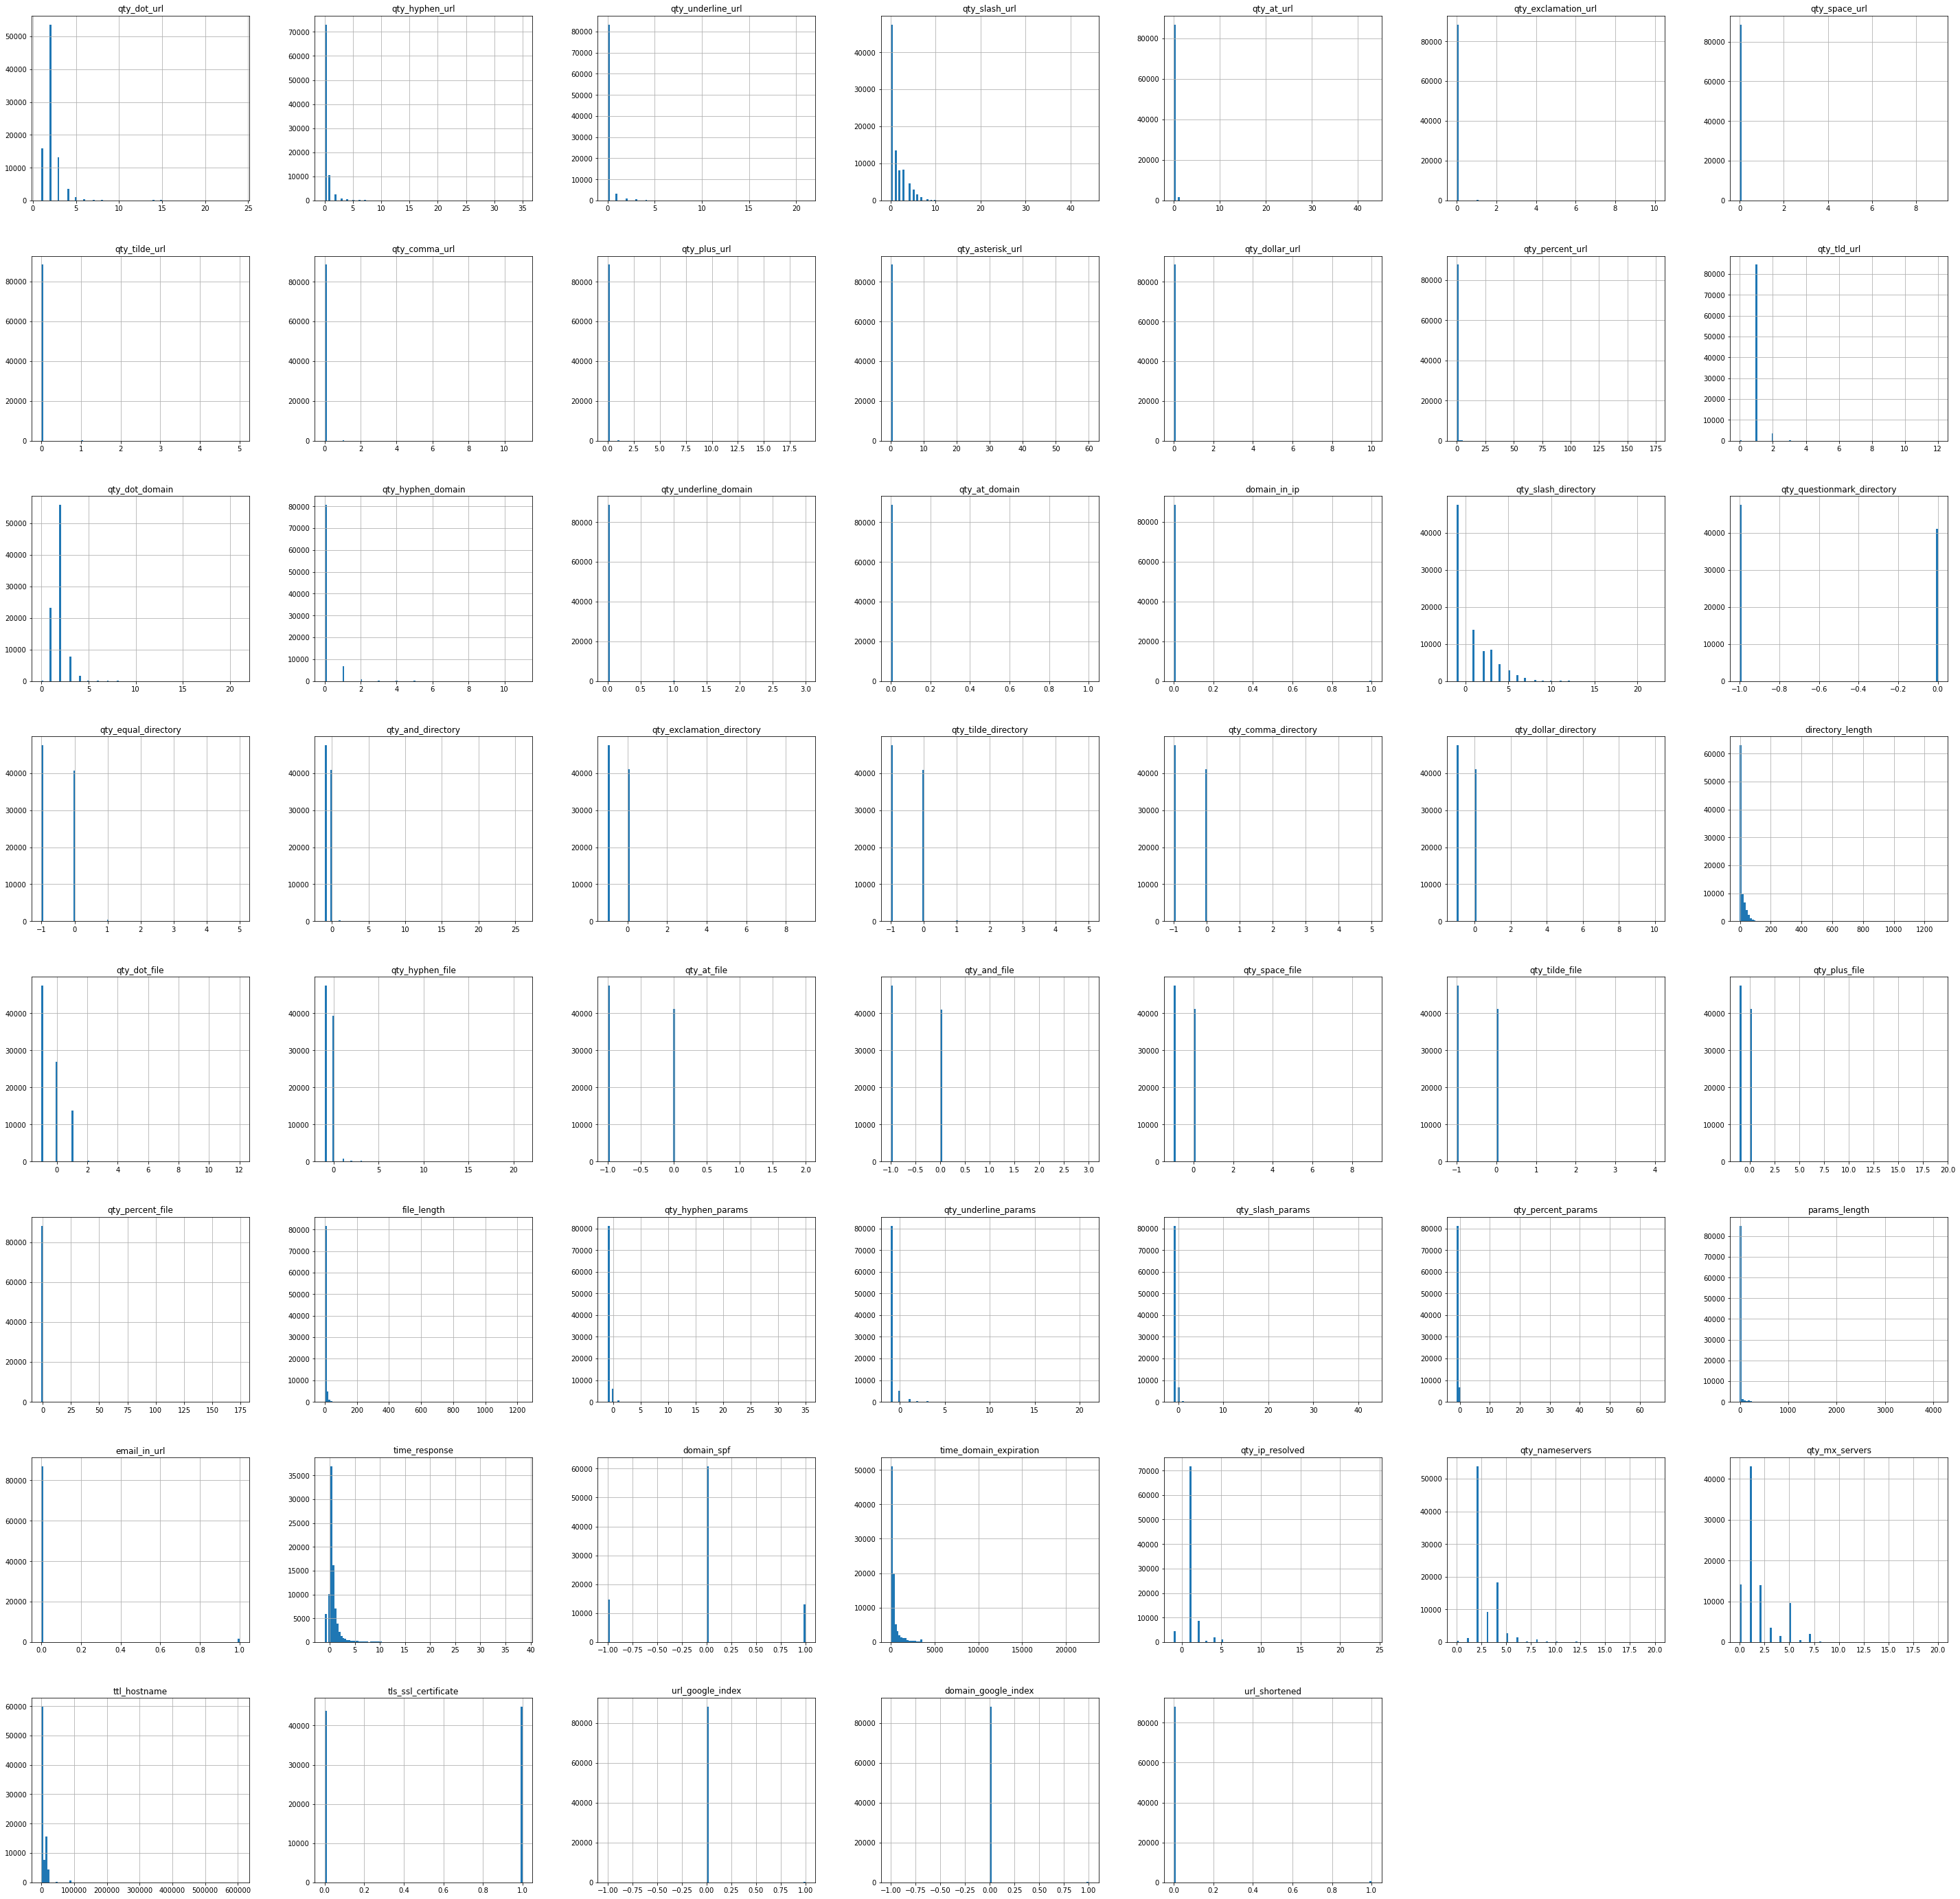

In [52]:
# Lets see the values of each feature and the distribution of these values.
x.hist(bins = 100,figsize = (50,50))
plt.show()

There is a boolean feature (0 or 1) named 'domain_spf' in above plots in which it is found a third value (-1). We will replace this value by any of the two (0 or 1) values based on the role of feature and ratio of legitimate & phishing class labels. 

In [53]:
# replacing -1 value by (0 or 1) based on split ratio of class label i.e. 65:35
for feat in ["domain_spf",'domain_google_index']:
    print(x[feat].value_counts())

    idx_0 = x[feat][x[feat]==-1].sample(frac=0.65).index
    x.loc[idx_0,feat]=0
    idx_1 = x[feat][x[feat]==-1].index
    x.loc[idx_1,feat]=1

    print('\ndistribution of feature values after replacement:')
    print(x[feat].value_counts())

 0    60882
-1    14677
 1    13088
Name: domain_spf, dtype: int64

distribution of feature values after replacement:
0    70422
1    18225
Name: domain_spf, dtype: int64
 0    88292
 1      267
-1       88
Name: domain_google_index, dtype: int64

distribution of feature values after replacement:
0    88349
1      298
Name: domain_google_index, dtype: int64


In [54]:
# finally searching & removing constant value features
# https://stackoverflow.com/questions/20209600/pandas-dataframe-remove-constant-column
x.loc[:,x.apply(pd.Series.nunique) == 1]

""
0
1
2
3
4
...
88642
88643
88644
88645


So from above result we have no constant value features to be removed.

# Feature Selection


In [55]:
x.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_at_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_dollar_url',
       'qty_percent_url', 'qty_tld_url', 'qty_dot_domain', 'qty_hyphen_domain',
       'qty_underline_domain', 'qty_at_domain', 'domain_in_ip',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_and_directory', 'qty_exclamation_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_dollar_directory',
       'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_at_file',
       'qty_and_file', 'qty_space_file', 'qty_tilde_file', 'qty_plus_file',
       'qty_percent_file', 'file_length', 'qty_hyphen_params',
       'qty_underline_params', 'qty_slash_params', 'qty_percent_params',
       'params_length', 'email_in_url', 'time_response', 'domain_spf',
       'time_domain_expiration', 'qty_ip_reso

In [56]:
#checking for the feature importance from sklearn library
from sklearn.feature_selection import SelectKBest
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Mutual information-> https://en.wikipedia.org/wiki/Mutual_information
from sklearn.feature_selection import mutual_info_classif # similar to information gain
importance = SelectKBest(score_func=mutual_info_classif, k='all')
importance.fit(x,y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x0000029C0DAEF8B0>)

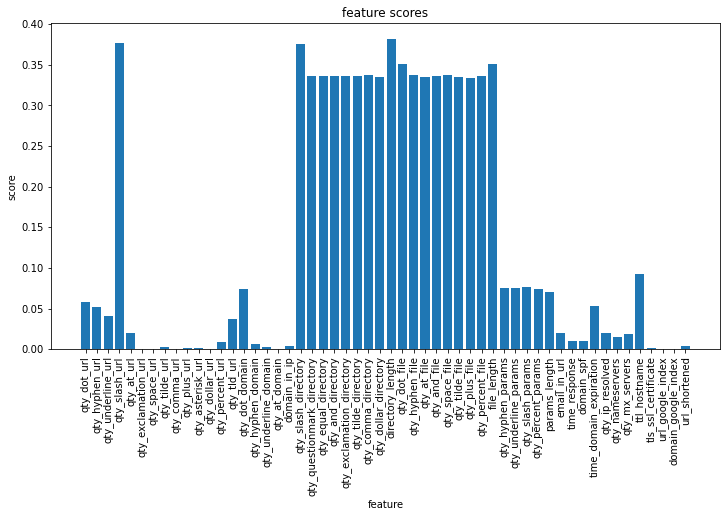

In [57]:
# plot the scores
labels = x.columns
plt.figure(figsize=(12, 6))
plt.bar([labels[i] for i in range(len(importance.scores_))], importance.scores_)
plt.title('feature scores')
plt.xlabel('feature')
plt.ylabel('score')
plt.xticks(rotation=90)
plt.show()

As we can see above graph is having features with low importance so we can simply remove such features. These features are calculated as having less than 30 percent of feature importance score.

In [58]:
max_value = np.max(importance.scores_)
for pair in [(labels[i], importance.scores_[i]) for i in range(len(importance.scores_))]:
    if pair[1] < 0.1*max_value:
        x= x.drop(pair[0], axis = 1)

In [59]:
print(x.columns)
x.shape

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_dot_domain', 'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_and_directory', 'qty_exclamation_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_dollar_directory',
       'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_at_file',
       'qty_and_file', 'qty_space_file', 'qty_tilde_file', 'qty_plus_file',
       'qty_percent_file', 'file_length', 'qty_hyphen_params',
       'qty_underline_params', 'qty_slash_params', 'qty_percent_params',
       'params_length', 'time_domain_expiration', 'ttl_hostname'],
      dtype='object')


(88647, 30)

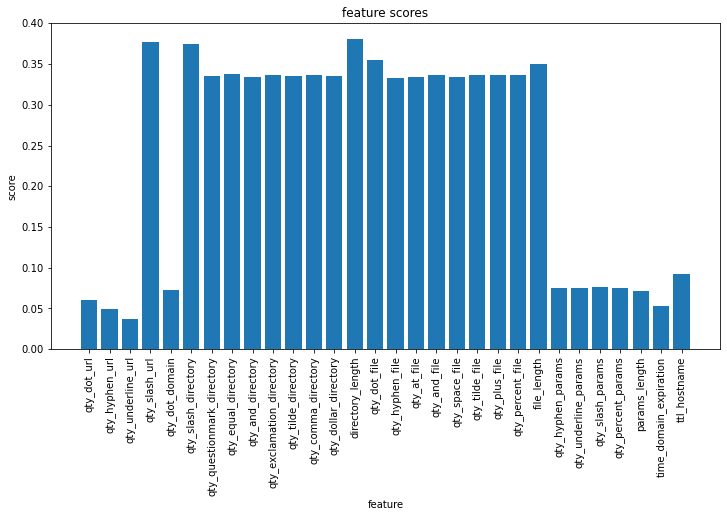

In [60]:
#again checking for feature importances
importance.fit(x,y)
labels = x.columns
plt.figure(figsize=(12, 6))
plt.bar([labels[i] for i in range(len(importance.scores_))], importance.scores_)
plt.title('feature scores')
plt.xlabel('feature')
plt.ylabel('score')
plt.xticks(rotation=90)
plt.show()

Now we have features with non zero feature importance values or scores as shown in above plot

In [62]:
x.to_csv('./x_data.csv', index = False)
y.to_csv('./y_data.csv', index = False)